**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
dados = pd.read_csv("F4.txt", sep="\s+", header=None)
dados_normais = dados.iloc[:160, :]
m_n = dados_normais.mean(axis=0)
std_n = dados_normais.std(axis=0)
# remoção das médias e normalização
dados = dados - m_n
dados = dados/std_n

# Questão 1

In [3]:
amostra_100 = dados.iloc[:100, :].values
cov_matriz = np.cov(amostra_100.T)
## calcula os autovalores/vetores
#OBS: no python, os autovalores não necessariamente estão ordenados do maior para o menor
autovalores, autovetores = np.linalg.eig(cov_matriz)
# orderna os autovalores do maior para o menor
ord_autovalores =  sorted(autovalores, reverse=True)

A variância total dos dados pode ser obtida a partir da soma dos autovalores.

In [4]:
var_total = sum(ord_autovalores)
var_total

54.00427465995586

In [101]:
var_retida = (np.array(ord_autovalores).cumsum()/var_total)*100

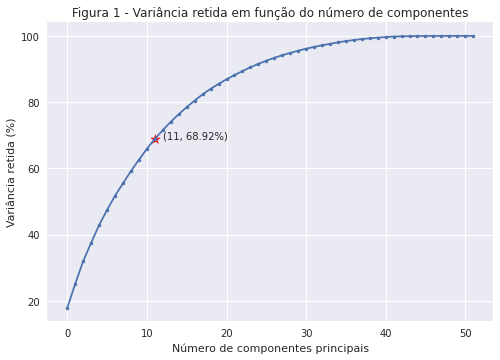

In [108]:
fig, ax = plt.subplots()
ponto = [11, var_retida[11]]
ax.plot(var_retida, marker='.')
ax.scatter(ponto[0], ponto[1], s=100, c='red', marker='*')
ax.text(ponto[0]+1, ponto[1], s='({}, {:.2f}%)'.format(ponto[0], ponto[1]))
ax.set_xlabel("Número de componentes principais")
ax.set_ylabel("Variância retida (%)")
plt.title("Figura 1 - Variância retida em função do número de componentes");

In [123]:
def indices_autovalores(a, oa, nc=2):
    indices = [np.where(np.isclose(a, oa[i]))[0][0] for i in range(nc)]
    return indices

In [124]:
id_cp2 = indices_autovalores(autovalores, ord_autovalores, nc=2)

In [125]:
id_cp2

[0, 1]

In [126]:
# dados_n = dados.iloc[:160, :].values
dados_normais_p = dados.iloc[:160, :].values.dot(autovetores[:, id_cp2])
dados_falha_p = dados.iloc[160:, :].values.dot(autovetores[:, id_cp2])

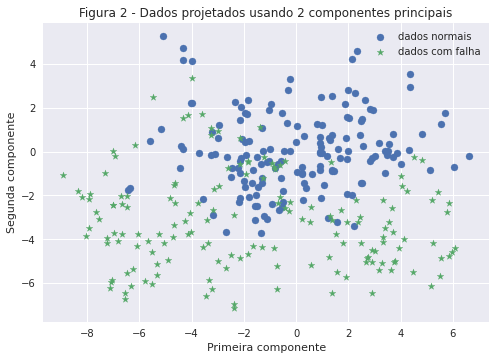

In [127]:
plt.scatter(dados_normais_p[:,0],dados_normais_p[:,1], label="dados normais")
plt.scatter(dados_falha_p[:,0],dados_falha_p[:,1], label="dados com falha", marker='*')
plt.title("Figura 2 - Dados projetados usando 2 componentes principais")
plt.xlabel("Primeira componente")
plt.ylabel("Segunda componente")
plt.legend();

# Questão 3

In [128]:
from scipy.stats import f

In [129]:
def limiar_t2(n_cp,n):
    p1 = (n_cp * (n-1) * (n+1))/(n * (n - n_cp))
    p3 = f.ppf(0.95, n_cp, n-n_cp)
    return p1*p3

In [130]:
def T2(X, N):
    S = X.T @ X/(N-1)
    t2 = []
    Si = np.linalg.inv(S)
    for i in range(N):
        a = X[i, :] @ Si @ X[i,:].T
        t2.append(a)
    return t2

def FDR(TP, FN):
    return TP/(TP+FN)
def FAR(FP, TN):
    return FP/(FP+TN)

In [131]:
id_cp11 = indices_autovalores(autovalores, ord_autovalores, nc=11)

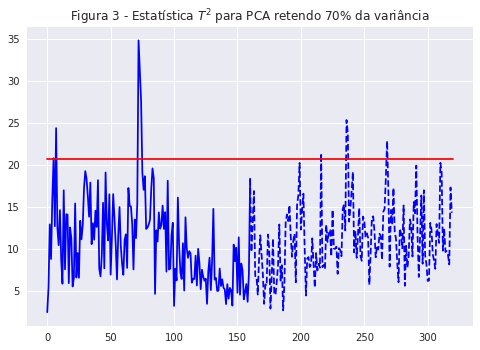

In [132]:
X = dados.values.dot(autovetores[:, id_cp11])
l = limiar_t2(11, 320)
t2X = T2(X, 320)
fig, ax = plt.subplots()
xl = [0, 320]
yl = [l, l]
xnorm = np.arange(161)
xfalha = np.arange(160, 320)
ax.plot(xnorm, t2X[:161],c='blue')
ax.plot(xfalha, t2X[160:],c='blue', ls='--')
ax.plot(xl, yl, c='r')
ax.set_title(r'Figura 3 - Estatística $T^2$ para PCA retendo 70% da variância');

In [133]:
TP = sum(t2X[160:]>l) # falhas que ultrapassam o limiar
TN = sum(t2X[:160]<l) # normais que não ultrapassam o limiar
FP = sum(t2X[:160]>l) # normais que ultrapassam o limiar
FN = sum(t2X[160:]<l) # falhas que não ultrapassam o limiar

In [134]:
FDR(TP, FN), FAR(FP, TN)

(0.025, 0.03125)

# Questão 4

In [135]:
lista_componentes = np.arange(2, 53)
fdrs = []
fars = []
for cp in lista_componentes:
    indice_cp = indices_autovalores(autovalores, ord_autovalores, nc=cp)
    X = dados.values.dot(autovetores[:, indice_cp])
    l = limiar_t2(cp, 320)
    t2X = T2(X, 320)

    TP = sum(t2X[160:]>l) # falhas que ultrapassam o limiar
    TN = sum(t2X[:160]<l) # normais que não ultrapassam o limiar
    FP = sum(t2X[:160]>l) # normais que ultrapassam o limiar
    FN = sum(t2X[160:]<l) # falhas que não ultrapassam o limiar
    fdrs.append(FDR(TP, FN))
    fars.append(FAR(FP, TN))

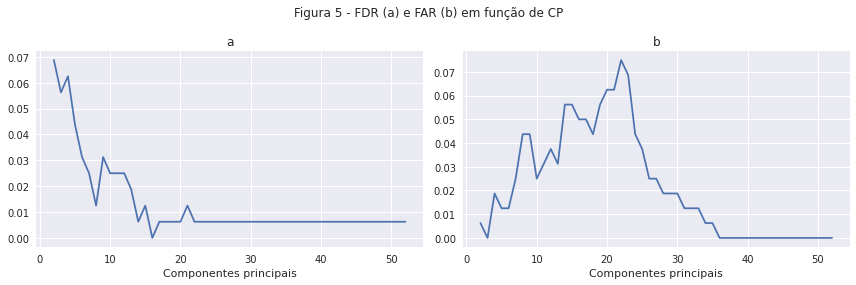

In [136]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].plot(lista_componentes, fdrs)
ax[1].plot(lista_componentes, fars)
ax[0].set_title("a")
ax[0].set_xlabel("Componentes principais")
ax[1].set_xlabel("Componentes principais")
ax[1].set_title("b")
plt.suptitle("Figura 5 - FDR (a) e FAR (b) em função de CP");
plt.tight_layout()

# Questãp 5

In [137]:
cov_matriz.shape

(52, 52)

In [138]:
t2x = T2(dados.values, 320)

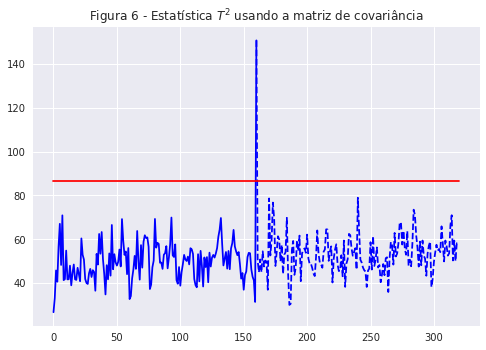

In [140]:
X = dados.values
l = limiar_t2(52, 320)
fig, ax = plt.subplots()
xl = [0, 320]
yl = [l, l]
xnorm = np.arange(161)
xfalha = np.arange(160, 320)
ax.plot(xnorm, t2X[:161],c='blue')
ax.plot(xfalha, t2X[160:],c='blue', ls='--')
ax.plot(xl, yl, c='r')
plt.title("Figura 6 - Estatística $T^2$ usando a matriz de covariância");

Não, o limiar obtido usando todos as variáveis só detecta uma falha no ponto onde os dados passam da normalidade para a falha. No restante do tempo mais nenhuma falha é detectada.

In [99]:
t2X[160]

150.6989892591604

# Questão 6